In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [4]:
df_item=pd.read_csv('../raw_data/items.csv')
df_IC=pd.read_csv('../raw_data/item_categories.csv')
df_train=pd.read_csv('../raw_data/sales_train.csv')
df_shop=pd.read_csv('../raw_data/shops.csv')
df_sample=pd.read_csv('../raw_data/sample_submission.csv')
df_test=pd.read_csv('../raw_data/test.csv')

In [5]:
df_train.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [7]:
df_train['date'] = pd.to_datetime(df_train['date'])

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int64         
 2   shop_id         int64         
 3   item_id         int64         
 4   item_price      float64       
 5   item_cnt_day    float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 134.4 MB


In [9]:
df_train['mnt-year']=df_train['date'].dt.to_period('M')

In [10]:
group_train=df_train.groupby(['mnt-year'])['mnt-year','item_cnt_day'].agg({'item_cnt_day':'sum'})

/tmp/ipykernel_7920/2529117706.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group_train=df_train.groupby(['mnt-year'])['mnt-year','item_cnt_day'].agg({'item_cnt_day':'sum'})


In [17]:
group_train = group_train.reset_index()
group_train.set_index(['mnt-year'], inplace=True)
group_train.rename(columns = {'item_cnt_day':'item_cnt_month'}, inplace = True)

In [18]:
group_train.head()

,item_cnt_month
mnt-year,
2013-01,116950.0
2013-02,133607.0
2013-03,140586.0
2013-04,112185.0
2013-05,116808.0


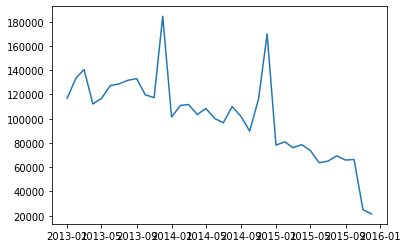

In [23]:
plt.plot(group_train.to_timestamp())

Text(0.5, 0, 'Date')

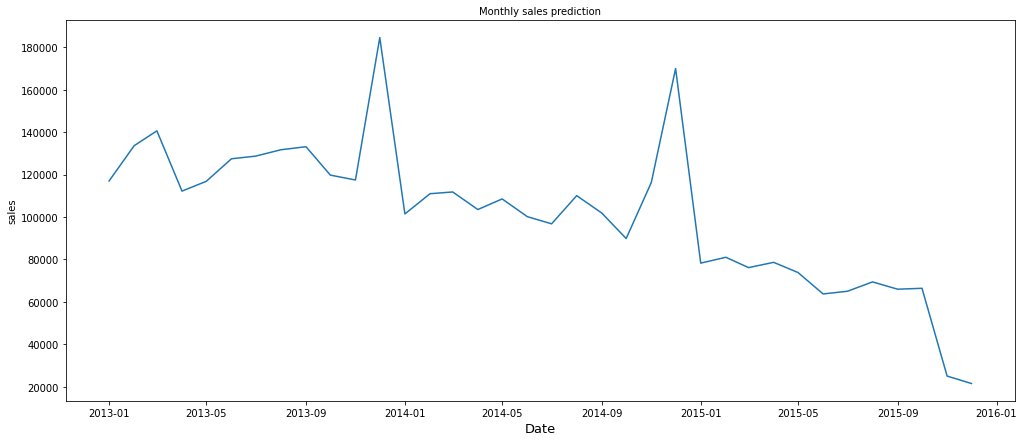

In [24]:
fig, ax = plt.subplots(1, figsize=(17,7))
plt.plot(group_train.to_timestamp().index,group_train['item_cnt_month']);
ax.set_title("Monthly sales prediction", size=10)
ax.set_ylabel("sales", size=10)
ax.set_xlabel("Date", size=13)